### **The basis of Recurrent**

**Consider the model**

Provide **data** and **labels** and define **a model architecture** $\rightarrow$ the model learns the **rules** that **fit the data to the labels** $\rightarrow$ those rules become available as an API that will back predicted labels for future data.

<center>

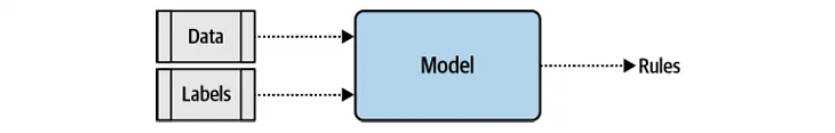

</center>

But, **the data is lumped in wholesale** $\rightarrow$ **no granularity involved** and **no effort to understand** the sequence in which that data occurs.

$\Rightarrow$ Means the words **`“blue”`** and **`“sky”`** have **no different meaning in sentences** such as:
- **Today I am blue, because the sky is gray**
- **Today I am happy, and there’s a beautiful blue sky**

$\Rightarrow$ **The limitations of the models like Sarcasm heading detector**

$\Rightarrow$ **Solution**: Recurrence

### **The nature of recurrence and how the basic RNN can work**

**Consider the Fibonacci sequence of numbers**

<center>

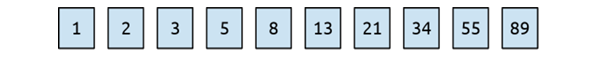

</center>

**Idea**: Every number is the sum of the two numbers preceding it and a computational graph is

<center>

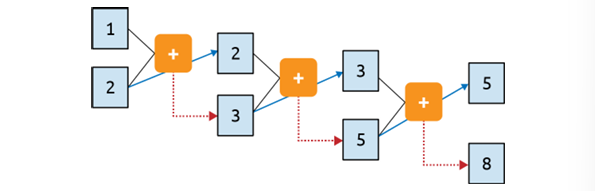

</center>

$\Rightarrow$ This process **continues indefinitely**, with every operation depending on those before it and some of the essence of the 1 is **`preserved` throughout the sequence**, though its **impact on the overall value** is **`diminished`**.

$\Rightarrow$ Analogous to how a recurrent neuron is architected

<center>

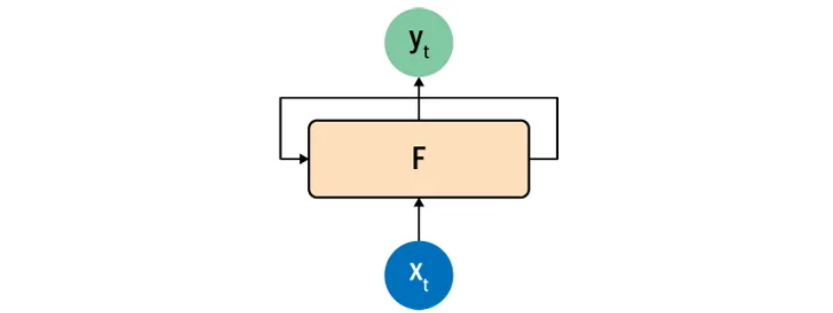

<caption>The typical representation of a recurrent neuron</caption>

</center>

The value `x` is fed into the function `F` **at a time step** $\rightarrow$ labelled $`x_t`$. This **produces** an **output** `y` **at that time step** $\rightarrow$ labelled $y_t$. 

It **ALSO produces a value** that is **fed forward to the next step**, which is indicated by **the arrow from `F` to itself**.

**A little clearer** if look at how recurrent neurons work beside each other across time steps

<center>

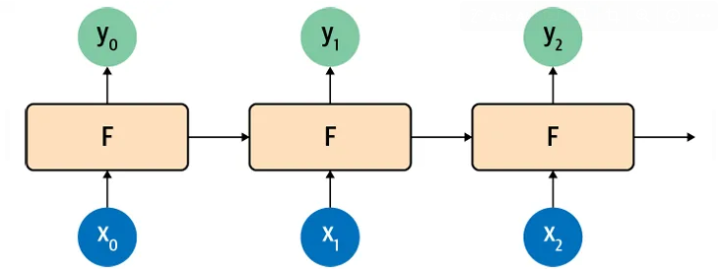

</center>

1. $x_0$ is **operated on** to **get** $y_0$ and **a value that's passed forward**. 
2. The next step gets **that value** and $x_1$ and **produces** $y_1$ and **a value that’s passed forward**. 
3. The next one gets **that value** and $x_2$ and **produces** $y_2$ and **a pass-forward value**, and so on. 

$\Rightarrow$ **Similar to the Fibonacci sequence works.**

### **Extending Recurrence for Language**

**RRNN** can help **maintain context across a sequence**. But there’s a **nuance** when it comes to language that can be **missed** when using a simple RNN above.

As **the Fibonacci sequence**, **the amount of context** that’s **carried over will diminish over time** $\Rightarrow$ **The effect of the output of the neuron at step 1 is huge at step 2, smaller at step 3, smaller still at step 4, and so on**.

$\rightarrow$ S: ***Today has a beautiful blue \<something\>*** $\rightarrow$ the word **blue** will have **a strong impact on the next word** $\rightarrow$ guess that it’s likely to be **sky**.


**`Question`**: *But what about context that comes from further back in a sentence?* 

$\rightarrow$ S: ***I lived in Ireland, so in high school I had to learn how to speak and write \<something\>***  $\rightarrow$ **\<something\> is Gaelic**, but the word gives us that context is **Ireland**, which is **much further back** in the sentence. 

$\Rightarrow$ To recognize what **\<something\>** should be, a way for context to be **preserved across a longer distance** is needed. 

**SOLUTION**: *The short-term memory of an RNN needs to get longer, and in recognition of this, an enhancement to the architecture called long short-term memory (LSTM) was invented.*

### **Architecture**

**The LSTM architecture** enhances the basic RNN by **adding a `cell state`** that enables **`context`** to **be maintained not just from step to step but across the entire sequence of steps**. 

**Remember**: These are **neurons learning** in the way **neurons do**, ensures that **the important context will be learned over time**.

<center>

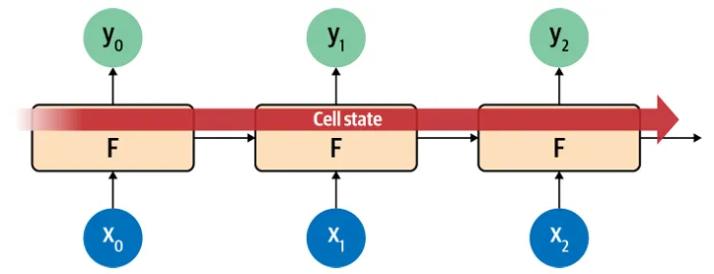

<caption>High-level view of LSTM architecture</caption>

</center>

An important part of an **LSTM** is that it can be **`bidirectional`**—**the time steps are iterated both forward and backward** $\rightarrow$ context can be learned in both directions.


<center>

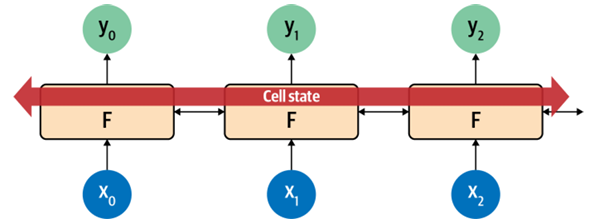
<caption>High-level view of LSTM bidirectional architecture</caption>

</center>

In this way, **evaluation in the direction from `0` to `number_of_steps` is done**, as **is evaluation from `number_of_steps` to `0`**. 

At each step, the **`y`** result is **an aggregation of the `forward` pass and the `backward` pass**.

<center>

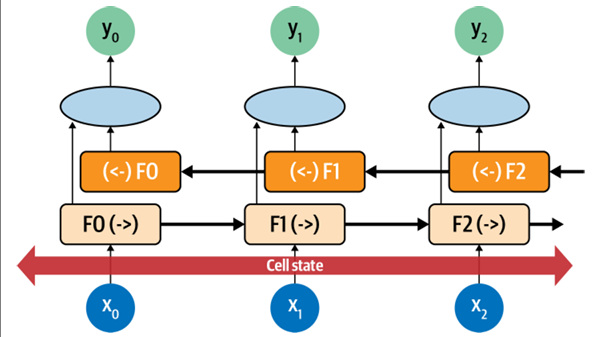

</center>

Consider each neuron at each time step to be **`F0`**, **`F1`**, **`F2`**, etc. 

The direction of the time step shows the calculation at F1 in the **forward** direction is **`F1(->)`**, and in the **reverse** direction it’s **`(<-)F1`**. **Theses values** are **aggregated** to give **the y value** for that time step. 

Additionally, the cell state is **bidirectional** $\rightarrow$ useful for **managing context in sentences**. 

$\rightarrow$ S: ***I lived in Ireland, so in high school I had to learn how to speak and write \<something\>*** - **\<something\> was qualified to be Gaelic** by **the context word Ireland** .

*But what if it were the other way around?* 

$\rightarrow$ S: ***I lived in \<this country\>, so in high school I had to learn how to speak and write Gaelic?*** $\Rightarrow$ By going backward through the sentence $\rightarrow$ can learn about what **\<this country\>** should be.

$\Rightarrow$ **Using bidirectional LSTMs can be very powerful for understanding sentiment in text**

### **Creating a Text Classifier with RNNs**

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns

# Remove the HTML tags
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
import json

# Take the stopwords
import spacy
import string 

en = spacy.load("en_core_web_lg")
stopwords = en.Defaults.stop_words

In [2]:
datastore = []
table = str.maketrans('', '', string.punctuation)

with open ('./datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2/Sarcasm_Headlines_Dataset_v2.json') as jsonFile:
    for line in jsonFile:
        line = json.loads(line)
        datastore.append(line)      
        
sentences = []
labels = []  

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

# Preprocessing the data
for i, sentence in enumerate(sentences):
    # Remove if have HTML tags
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    
    sentence = sentence.lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    
    filter_sentence = ""
    words = sentence.split()
    
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filter_sentence = filter_sentence + word + " "
    
    sentences[i] = filter_sentence

C:\Users\nguye\AppData\Local\Temp\ipykernel_12068\192678232.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [3]:
train_size = 23000

train_set = sentences[:train_size]
test_set = sentences[train_size:]

train_label = labels[:train_size]
test_label = labels[train_size:]

In [4]:
# Convert the training set into numpy array
train_set = np.array(train_set)
train_label = np.array(train_label)

test_set = np.array(test_set)
test_label = np.array(test_label)


In [5]:
vocal_size = 20000
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocal_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

In [6]:
word_index = tokenizer.word_index

word_index

{'<OOV>': 1,
 'new': 2,
 'trump': 3,
 'man': 4,
 'report': 5,
 'year': 6,
 'day': 7,
 'woman': 8,
 'u': 9,
 'area': 10,
 's': 11,
 'time': 12,
 'says': 13,
 'donald': 14,
 'like': 15,
 'old': 16,
 'life': 17,
 'people': 18,
 'trumps': 19,
 'house': 20,
 'white': 21,
 'obama': 22,
 'women': 23,
 '5': 24,
 'clinton': 25,
 'world': 26,
 'years': 27,
 'family': 28,
 'way': 29,
 'americans': 30,
 'black': 31,
 'study': 32,
 'american': 33,
 'school': 34,
 'gop': 35,
 'bill': 36,
 '3': 37,
 'finds': 38,
 'best': 39,
 'nation': 40,
 'know': 41,
 'cant': 42,
 'police': 43,
 'going': 44,
 '10': 45,
 'watch': 46,
 'good': 47,
 'death': 48,
 'state': 49,
 'home': 50,
 'president': 51,
 'video': 52,
 '2': 53,
 'big': 54,
 'things': 55,
 'love': 56,
 'parents': 57,
 'campaign': 58,
 'mom': 59,
 'right': 60,
 'health': 61,
 'getting': 62,
 'party': 63,
 'work': 64,
 'hillary': 65,
 'kids': 66,
 '000': 67,
 'self': 68,
 'gets': 69,
 'dead': 70,
 'little': 71,
 'high': 72,
 'need': 73,
 'doesnt': 74,


In [7]:
train_sequence = tokenizer.texts_to_sequences(train_set)
test_sequence = tokenizer.texts_to_sequences(test_set)


train_sequence_padded = pad_sequences(train_sequence, padding='post', maxlen=100)  
test_sequence_padded = pad_sequences(test_sequence, padding='post', maxlen=100)  

In [8]:
embedding_dim = 64

tf.keras.layers.Embedding(vocal_size, embedding_dim)

<Embedding name=embedding, built=False>

With the classifier for the Sarcasm dataset using embeddings $\rightarrow$ words were turned into vectors before being aggregated and then fed into dense layers for classification.

When using an RNN layer such as an LSTM $\rightarrow$ doesn’t do the aggregation and can feed the output of the embedding layer **directly** into the recurrent layer.

When it comes to the **dimensionality of the recurrent layer**, a rule of thumb  often see is that it’s the **same size as the embedding dimension** *[This isn’t necessary, but can be a good starting point]*. 

**Note**: The **embedding dimension** is often **the fourth root of the size of the vocabulary**, when using RNNs, ***that rule is ignored because it would make the size of the recurrent layer too small***.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [10]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [1]:
model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

NameError: name 'model' is not defined

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │         3,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,047,509 (15.44 MB)

 Trainable params: 1,349,169 (5.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,698,340 (10.29 MB)

In [14]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

NameError: name 'model_history' is not defined

In [ ]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

### **Stacking LSTMs**

The LSTMs can be **stacked on top of each other** and **this approach is used in many `state-of-the-art` NLP models**.

Add them as extra layers just like a **Dense layer** but **all of the layers** prior to **the last one** need to set their **`return_sequences = True`**.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [ ]:
model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

**The final layer** can set **`return_sequences=True`** $\rightarrow$ in which case, **return sequences of values** to the dense layers for classification **instead of single ones**. 

In [ ]:
model.summary()

In [ ]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

In [ ]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

### **Optimizing stacked LSTMs**

**Reduce the learning rate**

Try to reduce the learning rate by **20%** from **0.00001** to **0.000008**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.000008, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

In [ ]:
model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

In [ ]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

In [ ]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

### **Using dropout**

**Using dropout in the LSTM layers**

It works exactly **the same as for dense layers**, where **random neurons are dropped** to **prevent a proximity bias from impacting the learning**.

**Dropout** can be implemented **using a parameter on the LSTM layer**.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocal_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True, dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, dropout=0.2)),
    tf.keras.layers.Dense(24, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])

In [ ]:
model_history = model.fit(train_sequence_padded, train_label, validation_data=(test_sequence_padded, test_label), epochs=30)

In [ ]:
# Extract history
result = model_history.history

# Define epochs and accuracy data
epochs = [i for i in range(len(result['accuracy']))]  
acc = result['accuracy']
val_acc = result['val_accuracy']

# Plot accuracy and validation accuracy
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=acc, label='Training Accuracy')  
sns.lineplot(x=epochs, y=val_acc, label='Validation Accuracy') 

# Add labels and legend
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Training and Validation Accuracy Over Epochs')
plt.legend()

# Show plot
plt.show()

In [ ]:
# Extract history
result = model_history.history

# Define epochs and loss data
epochs = [i for i in range(len(result['loss']))]  
lss = result['loss']
val_lss = result['val_loss']

# Plot loss and validation loss
plt.figure(figsize=(16, 8))
sns.lineplot(x=epochs, y=lss, label='Training Loss')  
sns.lineplot(x=epochs, y=val_lss, label='Validation Loss') 

# Add labels and legend
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()

# Show plot
plt.show()

### **Using Pretrained Embeddings with RNNs**